# Amazon Review Analysis

## Loading the Rdata

In [3]:
import pyreadr
import pandas as pd

# read the data from RData by using pyreadr
Data = pyreadr.read_r('../Assignment_2/Amazon.RData') 


In [203]:
df = Data["dat"]
# print(df.shape)
# type(df)
df.head()

,name,review,rating
0,Baby Trend Diaper Champ,"My husband and I selected the Diaper ""Champ"" m...",1
1,Baby Trend Diaper Champ,I have had a diaper genie for almost 4 years s...,1
2,Baby Trend Diaper Champ,We loved this pail at first. The mechanism see...,1
3,Baby Trend Diaper Champ,Bad construction is my main issue. My husband ...,1
4,Baby Trend Diaper Champ,Diaper catches and jams in the well and that i...,1


In [4]:
# subset the review
doct = df['review']
doct[0]

'My husband and I selected the Diaper "Champ" mainly because you can use ordinary trash bags and not be roped into buying the specialty refill bags, and it was moderately priced (a little less than the Diaper Dekor). It also seemed that the reviews of this product were generally more positive...The positives are:1. You can use any trash bag2. Easy to use and refillThe negatives are:1. The bag doesn\\\'t seal around the dirty diapers, so when it comes time to refill the bag, it\\\'s just like opening a regular trash can. Smells like the Champ is trying to knock YOU out with odor!2. The plastic seems to smell, ie. You put a dirty diaper in the hole, and flip the handle to dump the diaper into the champ. That "side" of the plastic dumper-thingie is in contact with the air inside the dirty diaper changer, so when you flip it over the next time to dispose of another diaper, you smell the last 8 diapers you put in there...pretty gross.3. The "odor seal" (some soft material) really seems to r

## Pre-processing: stemming

In [5]:
# import sklearn.feature extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import FrenchStemmer

stemmer = FrenchStemmer()
analyzer= CountVectorizer().build_analyzer()

def stemmed_words(doc): 
    return (stemmer.stem(w) for w in analyzer(doc))


## Extract the Document-Term matrix

In [242]:
# Document-Term matrix

vector = CountVectorizer(analyzer=stemmed_words)
dtm = vector.fit_transform(doct)

# print(DT_Trans.toarray())
dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [243]:
dtm.shape

(1312, 5186)

## Extract the TF-IDF matrix

In [232]:
# TF-IDF
vectorizer = TfidfVectorizer(token_pattern='[a-z]{3,15}')
TF_IDF = vectorizer.fit_transform(doct)
TF_IDF.toarray()

array([[0.        , 0.        , 0.02965964, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07525907, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06210033, ..., 0.        , 0.        ,
        0.        ]])

In [210]:
TF_IDF.shape

(1312, 5806)

## How many rating values are present in the dataset ? How many reviews of each rating value are there in the entire dataset? 

In [336]:
# Subset rating
y = df['rating']

# length of y
ratenumber = len(y)
print(ratenumber)

# check how many values in y
print(y.unique())

1312
[1 5]


In [221]:
# numbers of ranting 1

num1 = df[y == 1]
len(num1)

656

In [337]:
# numbers of ranting 5

num5 = df[df['rating']==5]
len(num5)

656

There total have 1312 rating values in the data. It has 2 levels which are rating 1 and rating 5. The rating 1 have 656 numbers and rating 5 have also 656 numbers, respectively. According to the levels of rating in the data, I think there have 2 clusters. 

## Perform on Kernel PCA

In [22]:
dfm.shape

(1312, 5186)

In [104]:
y.shape

(1312,)

### Document-Term Matrix on Kernel PCA

In [84]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

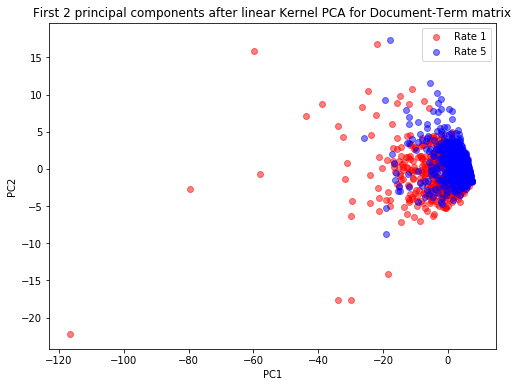

In [331]:
scikit_kpca = KernelPCA(n_components=2, kernel='linear', gamma=16) 
X_skernpca = scikit_kpca.fit_transform(dtm)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1], color='red', alpha=0.5, label = 'Rate 1')
plt.scatter(X_skernpca[y == 5, 0], X_skernpca[y == 5, 1], color='blue', alpha=0.5, label = 'Rate 5')

plt.title('First 2 principal components after linear Kernel PCA for Document-Term matrix')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend()
plt.show()

### TD-IDF Matrix on Kernel CPA

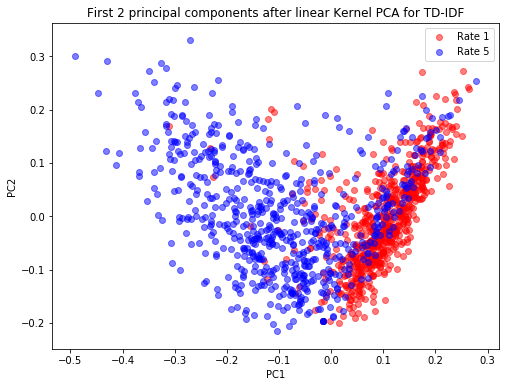

In [330]:
scikit_kpca = KernelPCA(n_components=2, kernel='linear', gamma=55) ## NOTE: 2 components
X_skernpca = scikit_kpca.fit_transform(TF_IDF)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1], color='red', alpha=0.5, label = 'Rate 1')
plt.scatter(X_skernpca[y == 5, 0], X_skernpca[y == 5, 1], color='blue', alpha=0.5, label = 'Rate 5')

plt.title('First 2 principal components after linear Kernel PCA for TD-IDF')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


## Perform on Multi-Dimensional Scaling (MDS)

### Docunment-Term Matrix on MDS

In [91]:
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS

In [244]:
# calculate distance for DT Matrix
Ddtm = pairwise_distances(dtm)
Ddtm.shape

(1312, 1312)

In [315]:
model = MDS(n_components=2, dissimilarity='precomputed', random_state=5)
outdtm = model.fit_transform(Ddtm) 

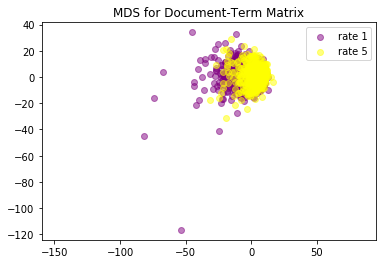

In [338]:
plt.scatter(outdtm[y==1, 0], outdtm[y==1, 1], c = 'purple',alpha =0.5, label = 'rate 1')
plt.scatter(outdtm[y==5, 0], outdtm[y==5, 1], c = 'yellow',alpha =0.5, label = 'rate 5')
plt.legend(loc = 'upper right')
plt.title('MDS for Document-Term Matrix')

plt.axis('equal')
plt.show()

### TF_IDF Matrix on MDS

In [246]:
Dtf = pairwise_distances(TF_IDF)
Dtf.shape

(1312, 1312)

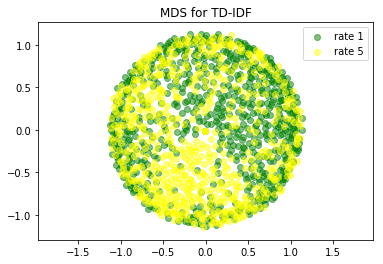

In [339]:
model = MDS(n_components=2, dissimilarity='precomputed', random_state=13)
out = model.fit_transform(Dtf) 
plt.scatter(out[y==1, 0], out[y==1, 1], c = 'green',alpha =0.5, label = 'rate 1')
plt.scatter(out[y==5, 0], out[y==5, 1], c = 'yellow',alpha =0.5, label = 'rate 5')
plt.legend(loc = 'upper right')
plt.title('MDS for TD-IDF')
plt.axis('equal');
plt.show()

## Perform on Isomap

### Document-Term Matrix on Isomap

In [253]:
from sklearn.manifold import Isomap

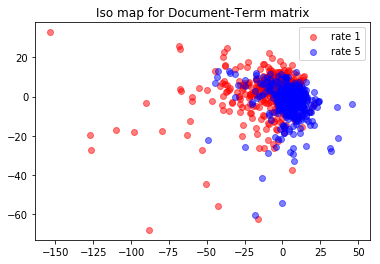

In [340]:
model = Isomap(n_components=2)
proj = model.fit_transform(dtm)
plt.scatter(proj[y==1, 0], proj[y==1, 1], c = 'red',alpha =0.5, label = 'rate 1')
plt.scatter(proj[y==5, 0], proj[y==5, 1], c = 'blue',alpha =0.5, label ='rate 5')
plt.title('Iso map for Document-Term matrix')
plt.legend(loc = 'upper right')
plt.show()


### TF-IDF Matrix on Isomap

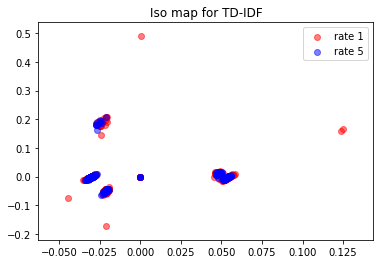

In [341]:
model = Isomap(n_neighbors = 1, n_components=2)
proj = model.fit_transform(tf)
plt.scatter(proj[y==1, 0], proj[y==1, 1], c = 'red',alpha =0.5, label = 'rate 1')
plt.scatter(proj[y==5, 0], proj[y==5, 1], c = 'blue',alpha =0.5, label ='rate 5')
plt.title('Iso map for TD-IDF')
plt.legend(loc = 'upper right')
plt.show()


## Perform on t-SNE

### Document-Term Matrix on t-SNE

In [300]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=5)
dtm_2d = tsne.fit_transform(dtm.toarray())


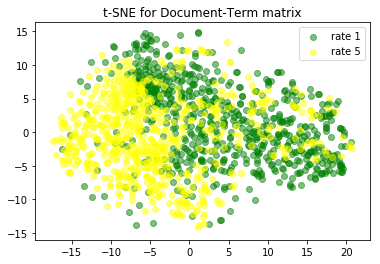

In [344]:
plt.scatter(dtm_2d[y==1, 0], dtm_2d[y==1, 1], c = 'green',alpha =0.5, label = 'rate 1')
plt.scatter(dtm_2d[y==5, 0], dtm_2d[y==5, 1], c = 'yellow',alpha =0.5, label ='rate 5')
plt.title('t-SNE for Document-Term matrix')
plt.legend(loc = 'upper right')
plt.show()


### TD-IDF Matrix on t-SNE

In [299]:
tsne = TSNE(n_components=2, random_state=7)
tf_2d = tsne.fit_transform(tf.toarray())

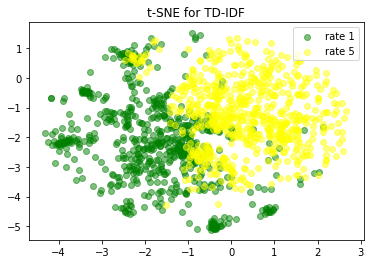

In [346]:
plt.scatter(tf_2d[y==1, 0], tf_2d[y==1, 1], c = 'green',alpha =0.5, label = 'rate 1')
plt.scatter(tf_2d[y==5, 0], tf_2d[y==5, 1], c = 'yellow',alpha =0.5, label ='rate 5')
plt.title('t-SNE for TD-IDF')
plt.legend(loc = 'upper right')
plt.show()
